# Sparse Hebbian Learning: toward a quantitative measure of the quality of filters

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SparseHebbianLearning/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
do_random = True # draw new coeff at random
do_random = False # draw new coeff with bootstrap resampling?

do_double_shuffle = True # shuffle accross dictionary elements
do_double_shuffle = False # only shuffles 

l0_sparseness_noise = 200 #shl.n_dictionary #

In [4]:
tag = 'coding'
homeo_methods = ['None', 'HAP', 'HEH']


record_num_batches = 2**12

seed = 42
np.random.seed(seed)

from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag)
indx = np.random.permutation(data.shape[0])[:record_num_batches]

list_figures = []

dico = {}
for homeo_method in homeo_methods:
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)


🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SparseHebbianLearning/blob/master/shl_scripts/shl_encode.py) script)

In [5]:
from shl_scripts.shl_encode import sparse_encode
stick = np.arange(shl.n_dictionary)*shl.nb_quant
P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))

for homeo_method in homeo_methods:
    shl = SHL(homeo_method=homeo_method)

    for P_cum_rec, gain_rec in zip([None, P_cum_zeroeffect, dico[homeo_method].P_cum], [np.ones(shl.n_dictionary), None, None]):
        sparse_code = sparse_encode(data[indx, :], dico[homeo_method].dictionary, precision=dico[homeo_method].precision, P_cum=P_cum_rec, C=shl.C, 
                                     l0_sparseness=shl.l0_sparseness, gain=gain_rec)   

        # from shl_scripts.shl_tools import print_stats
        # SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code)

## Generating new coefficients by shuffling and decoding

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


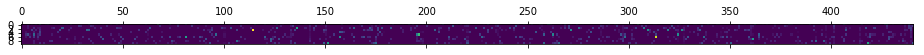

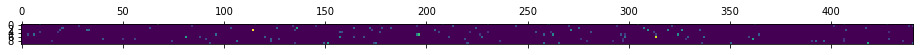

average non-zeros [ 450  570  627  923  781  485 3850  711  884  797  535  462 1069  723
  792  563  709  879 1041  398  967  363  601 2103  792  743 2902  446
  822 1325  703  469  707  569  504  592  270  488  657  721  719  623
  527  395  511  349  518  722  830  499  649  226  409  521  591  578
  494  301  641  494  560  703 2196 1006  763  844  280  736  666  849
 1316  595  636  573  491  899  905  754  748  319  516  595  761  273
  618  365  931  488  399  737  333  726  723  820  714  691  417  255
  566  433 1736  592  661  394  953  311  594  616  732  745  290  618
  482  676  484  713  567  818  760  670]
average non-zeros [163 126 101 162  98 113 357 168 152 133  76  89 123 146 134 107 146 117
 146  69 183  89 134 114 151 139 189  89 184 120 120  93 118 134 121  87
  71 128 120 137 161 125  84  81  93  76 135 106 116  63 127  61  81 112
 120 105 141  84 165 115 116 116 117 161  99 132  56 148 124 124  74 148
 159 117 104  99 114 158 157  58 105 133 111  65 114  92  93  

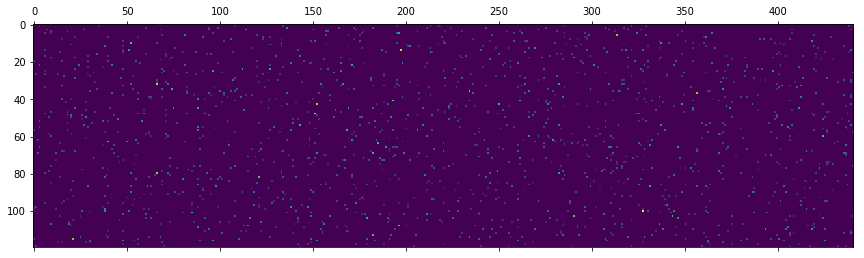

<Figure size 1080x216 with 0 Axes>

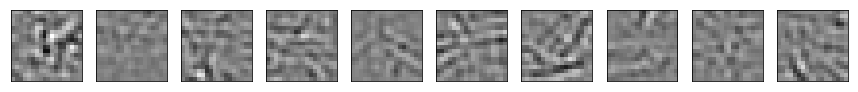

<Figure size 1080x216 with 0 Axes>

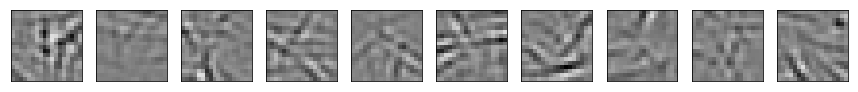

<Figure size 1080x216 with 0 Axes>

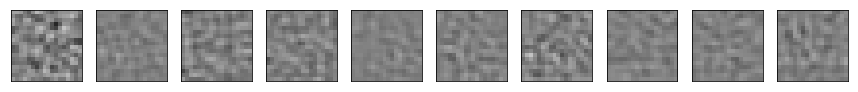

mean deviation of coefficients =  0.0829297041396368 0.03309984392709061 0.03215231257191326
total deviation of coefficients =  0.02135930953725111
mean deviation of quantiles =  0.003129681617346793
mean deviation of quantiles =  0.0031248995581007184
total deviation of quantiles =  0.002180115418263774
ratio deviation of quantiles =  0.6965933551132208
proba incorrect coefficients =  0.15787705055980727
proba incorrect coefficients (strong) =  0.02027917286706349
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


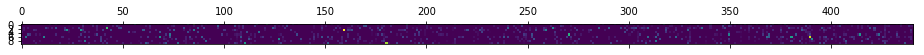

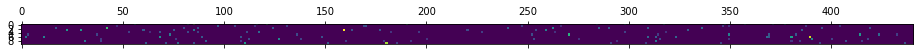

average non-zeros [ 910  707  698 1568  612  909  817  553  665  868  335  544  484  696
  578 1895  742  733  644  546  616 1100  917 2598  743  844  805  758
  646  541 2806  630  666  642  645  838  688  593  650  800  830  264
  998  926  816  670  577  562  918  961  713  380  246  843  659  668
  622  495 1035  725  774  768  588  953  383 1041  711  507  647  625
  665 1254  854 1034  986  935  643  799  817  637  682  827  572 2452
  797  924  620  690  828 1594  716  666  469  791  465  338  449  630
  509  822  726  644  398  457  713  687 3176  852 3360  466  416  814
  417  754  513  595  564  861  733  631]
average non-zeros [151 146 123  91  95 126  95  85 122 122  98 117  84 131  90  96 122 146
  97 120 103 170 166 148 129 110 123 150  90 128 155 123  93 113 116 101
 114 126  69 135 133  64  98 175 115 115 138 117 147 163 142  72  55 111
 100 104 125 147 126 133 101 138 103 132  78  98  59 109 134 112 111 102
 132 122 140 127 105 153 140 112 130 132 139 158 142 145 132 1

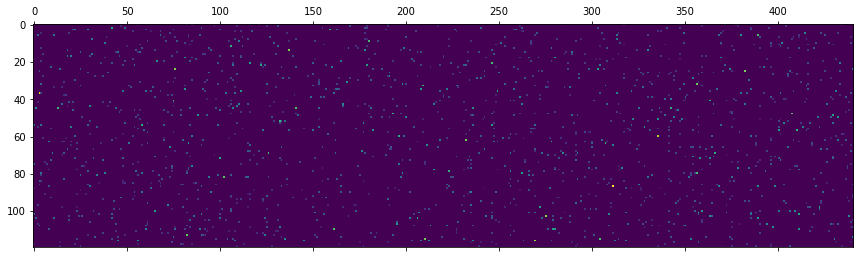

<Figure size 1080x216 with 0 Axes>

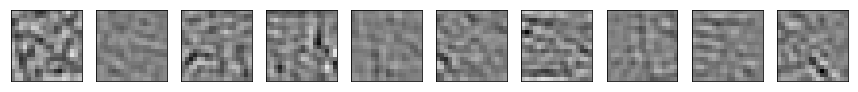

<Figure size 1080x216 with 0 Axes>

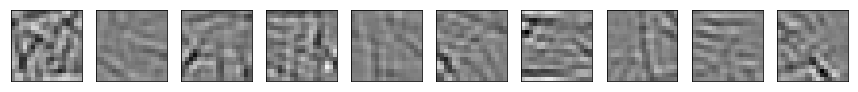

<Figure size 1080x216 with 0 Axes>

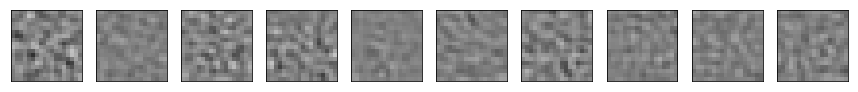

mean deviation of coefficients =  0.08687379635458592 0.033254097476664 0.0322945251746935
total deviation of coefficients =  0.021725703748184885
mean deviation of quantiles =  0.003129832684619859
mean deviation of quantiles =  0.003125516178142912
total deviation of quantiles =  0.002164413288038195
ratio deviation of quantiles =  0.6915428095163747
proba incorrect coefficients =  0.1815919075963719
proba incorrect coefficients (strong) =  0.020431414753401378
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


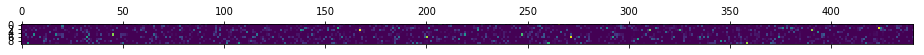

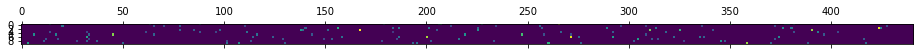

average non-zeros [ 967 1450  867 1664  933  708 1273 1090  669 1119  991 1754  805 1057
  849  678  850 2175 1454 1101 1083  866  702 1114 1003  861 1661 1281
 1145 1122  993 1087  885  945 1201 1070 1206 1395 1781 1430  658  985
 1588 1185 1656  987  773  764 1146 1109 1023 1375 1214 1187 1243  951
  561 1499  720 1447 1688 1130  905 1228  858  997 1041  833  824  914
  937  993 1163 1342  973  795 1431 1239 1284  943 1539 1824 1666 1418
 1457 1147  608 1630 1064  972 1032 1619 1014  825  839 1218 1081 1002
 1238 1036  706 1268 1561 2015  781 1349 1135  880 2598 1073 1232  992
 1499  807 1330  807  810  861 1297 1091]
average non-zeros [ 92 109 129 115 106 100 104  84  78 120 118 109  72 110 103  99  83 125
 134  87 125 111  86  64  84  97 150  94 110 139 130  97 110 126  97 124
 147  72 148 146  69  70 151  88 176 128  72  84 133 112 127 181  92 125
 136  91  90 168 100 201 187 156  96 157 113 105 101  94  81 132  96 124
 103 113  83  71 131 142 144  76  88 157 135 120 133 122  75 1

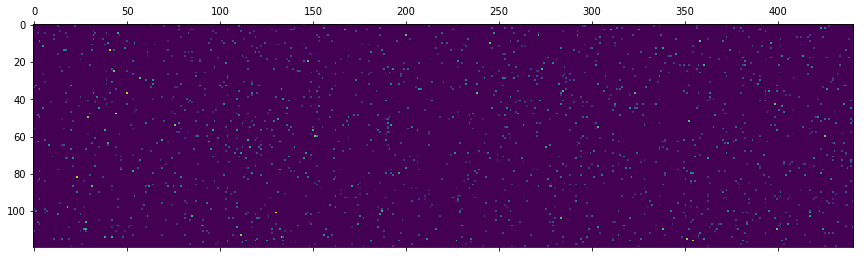

<Figure size 1080x216 with 0 Axes>

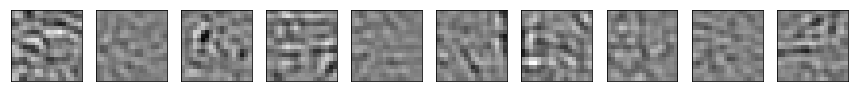

<Figure size 1080x216 with 0 Axes>

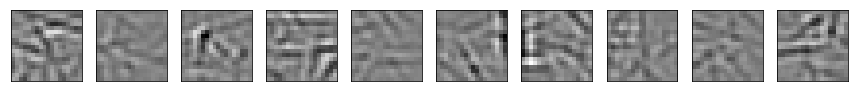

<Figure size 1080x216 with 0 Axes>

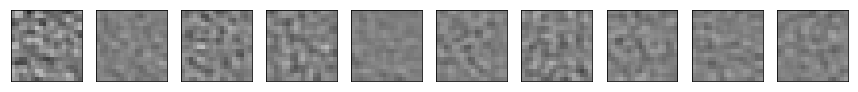

mean deviation of coefficients =  0.10285971064375246 0.03436840466398691 0.03351576806625265
total deviation of coefficients =  0.023674292741944773
mean deviation of quantiles =  0.0031324373092288817
mean deviation of quantiles =  0.003127798335015714
total deviation of quantiles =  0.002284325528799053
ratio deviation of quantiles =  0.7292486020610545
proba incorrect coefficients =  0.2668069506448413
proba incorrect coefficients (strong) =  0.02137808248299322


In [6]:
def shuffling(data, sparse_code, dico, N_show=10):
    if do_random:
        from shl_scripts.shl_encode import inv_quantile, inv_rescaling
        sparse_code_bar = inv_rescaling(inv_quantile(dico.P_cum, np.random.rand(sparse_code.shape[0], sparse_code.shape[1])), C=shl.C)
    else:
        sparse_code = sparse_encode(data, dico.dictionary, precision=dico.precision, P_cum=dico.P_cum, C=shl.C, 
                                     l0_sparseness=l0_sparseness_noise, gain=None)   

        sparse_code_bar = sparse_code.copy()
        
        sparse_code_bar = sparse_code_bar.T
        np.random.shuffle(sparse_code_bar)
        sparse_code_bar = sparse_code_bar.T
        
        if do_double_shuffle:
            np.random.shuffle(sparse_code_bar)

    plt.matshow(sparse_code_bar[:N_show, :])
    plt.show()

    def threshold(sparse_code, l0_sparseness):
        thr = np.percentile(sparse_code, 100 * (1 - l0_sparseness/shl.n_dictionary ), axis=1)
        return (sparse_code>thr[:, np.newaxis])

    sparse_code_bar_high = threshold(sparse_code_bar, shl.l0_sparseness) * sparse_code_bar
    plt.matshow(sparse_code_bar_high[:N_show, :])
    plt.show()
    return sparse_code_bar, sparse_code_bar_high

def pipeline(sparse_code_bar, sparse_code_bar_high, dico, index, N_show=120):

    patches_bar = sparse_code_bar @ dico.dictionary
    SD = np.sqrt(np.mean(patches_bar**2, axis=1))


    P_cum_rec = dico.P_cum
    gain_rec = None

    sparse_code_rec = sparse_encode(patches_bar, dico.dictionary, precision=dico.precision, P_cum=P_cum_rec, C=shl.C, 
                                     l0_sparseness=shl.l0_sparseness, gain=gain_rec)   

    print('average non-zeros', np.count_nonzero(sparse_code_bar, axis=0)[:N_show])
    print('average non-zeros', np.count_nonzero(sparse_code_bar_high, axis=0)[:N_show])
    print('average non-zeros', np.count_nonzero(sparse_code_rec, axis=0)[:N_show])
    
    from shl_scripts.shl_tools import print_stats
    SD, SE = print_stats(patches_bar, dico.dictionary, sparse_code_rec, verbose=False, display=True)
    #plt.matshow(sparse_code_rec[:N_show, :])
    plt.show()

    print('mean deviation of coefficients = ', np.mean(np.abs(sparse_code_bar)), np.mean(np.abs(sparse_code_bar_high)), np.mean(np.abs(sparse_code_rec)))
    print('total deviation of coefficients = ', np.mean(np.abs(sparse_code_bar_high-sparse_code_rec)))

    from shl_scripts.shl_encode import quantile, rescaling

    q_rec = quantile(dico.P_cum, rescaling(sparse_code_rec, C=shl.C), stick, do_fast=False)
    q_bar = quantile(dico.P_cum, rescaling(sparse_code_bar_high, C=shl.C), stick, do_fast=False)

    print('mean deviation of quantiles = ', np.mean(np.abs(q_bar)))
    print('mean deviation of quantiles = ', np.mean(np.abs(q_rec)))
    print('total deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec)))
    print('ratio deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar)))
    aerror = np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar))

    perror = 1 - np.mean( (sparse_code_bar>0) == (sparse_code_rec>0))
    print('proba incorrect coefficients = ', perror)

    perror_high = 1 - np.mean( (sparse_code_bar_high > 0) == (sparse_code_rec>0))
    print('proba incorrect coefficients (strong) = ', perror_high)
    
    return pd.DataFrame({'error':[(SD/SE).mean()],
                               'aerror':[aerror],
                               'perror':[perror],
                               'perror_high':[perror_high]
                                        },
                                index=[index])

record = None
for homeo_method in homeo_methods:
    print(15*'🐶' + homeo_method + 15*'🐶')
    
    shl = SHL(homeo_method=homeo_method)

    sparse_code_bar, sparse_code_bar_high = shuffling(data[indx, :], sparse_code, dico[homeo_method])
    record_ = pipeline(sparse_code_bar, sparse_code_bar_high, dico[homeo_method], index=homeo_method)
    if record is None:
        record = record_
    else:
        record = pd.concat((record, record_))


In [7]:
record

,error,aerror,perror,perror_high
None,2.144403,0.696593,0.157877,0.020279
HAP,2.119179,0.691543,0.181592,0.020431
HEH,2.045457,0.729249,0.266807,0.021378


In [8]:
record_

,error,aerror,perror,perror_high
HEH,2.045457,0.729249,0.266807,0.021378


## Version used

In [9]:
%load_ext version_information
%version_information shl_scripts, numpy, shl_scripts, pandas, matplotlib

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
shl_scripts 20171221
numpy 1.15.1
shl_scripts 20171221
pandas 0.23.4
matplotlib 3.0.0
Thu Sep 27 00:12:26 2018 CEST